In [42]:
import os
import json
from tqdm import tqdm

print("开始加载分析集结果")
# data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_stats_origin.jsonl"
data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_stats_deduped.jsonl"
f1 = open(data_path_result, 'r', encoding='utf-8')
result = []
for line in tqdm(f1.readlines()):
    result_line = json.loads(line)
    result.append(result_line["__dj__stats__"])
print("加载分析结果集结束")
print("分析结果集大小：", len(result))
result[0]

开始加载分析集结果


100%|██████████| 1059536/1059536 [00:07<00:00, 143881.27it/s]

加载分析结果集结束
分析结果集大小： 1059536


{'alnum_ratio': 1.0,
 'char_rep_ratio': 0.0,
 'lang': 'zh',
 'lang_score': 0.9015420675,
 'perplexity': 5107.6,
 'text_len': 7}

In [43]:
import pandas as pd
df = pd.DataFrame(result)
df.head()

,alnum_ratio,char_rep_ratio,lang,lang_score,perplexity,text_len
0,1.0,0.0,zh,0.901542,5107.6,7
1,1.0,0.0,zh,0.851976,7772.0,8
2,1.0,0.0,zh,0.764956,9754.6,8
3,1.0,0.0,zh,0.834716,8572.6,8
4,1.0,0.0,zh,0.875503,3468.7,9


In [44]:
describe = df.describe()

In [45]:
from matplotlib import pyplot as plt

def plot_hist(df, column_name, max_label, step):
    label_count = [0] * int(max_label / step)
    x_list = [i for i in range(int(max_label / step))]
    x_list = [i * step for i in x_list]
    for i in tqdm(range(len(df))):
        if int(df[column_name][i]) < max_label:
            label_count[int(df[column_name][i]/step)] += 1
        else:
            label_count[-1] += 1
    print("label_count: ",label_count)
    plt.bar(x_list, label_count)
    plt.xlabel(column_name)
    plt.ylabel("count")
    plt.xlim(0, max_label)
    plt.tight_layout()
    plt.show()

In [46]:
def analyze_result(df, column_name, max_label, step):
    print(column_name + " mean: ", describe[column_name]["mean"])
    print(column_name + " std: ", describe[column_name]["std"])
    print(column_name + " 3-σ left: ", describe[column_name]["mean"] - 3 * describe[column_name]["std"])
    print(column_name + " 3-σ right: ", describe[column_name]["mean"] + 3 * describe[column_name]["std"])
    plot_hist(df, column_name, max_label, step)

alnum_ratio mean:  0.9403015440073093
alnum_ratio std:  0.08971808067352725
alnum_ratio 3-σ left:  0.6711473019867276
alnum_ratio 3-σ right:  1.209455786027891


100%|██████████| 1059536/1059536 [00:10<00:00, 99454.03it/s] 


label_count:  [3, 65, 407, 629, 770, 3049, 10448, 61895, 225298, 756972]


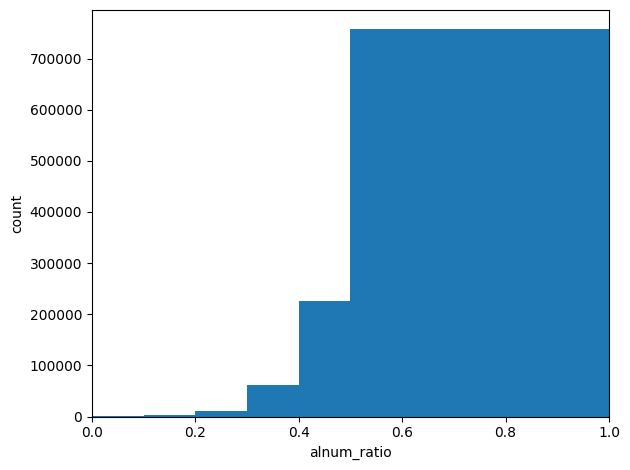

In [47]:
analyze_result(df, "alnum_ratio", 1, 0.1)

char_rep_ratio mean:  0.00043852897274184165
char_rep_ratio std:  0.01428722614454086
char_rep_ratio 3-σ left:  -0.042423149460880744
char_rep_ratio 3-σ right:  0.04330020740636442


100%|██████████| 1059536/1059536 [00:13<00:00, 76578.61it/s]


label_count:  [1058365, 157, 248, 206, 195, 222, 103, 32, 8, 0]


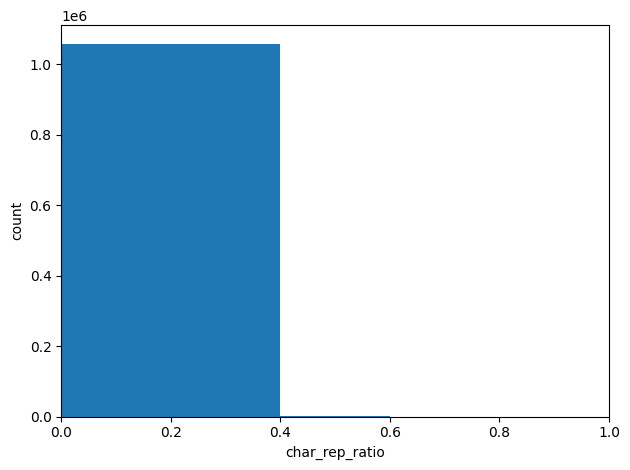

In [48]:
analyze_result(df, "char_rep_ratio", 1, 0.1)

lang_score mean:  0.69027554891915
lang_score std:  0.2390340854718623
lang_score 3-σ left:  -0.026826707496436897
lang_score 3-σ right:  1.407377805334737


100%|██████████| 1059536/1059536 [00:12<00:00, 84949.18it/s]


label_count:  [988, 24662, 60188, 74943, 86004, 124362, 123078, 131410, 156605, 277296]


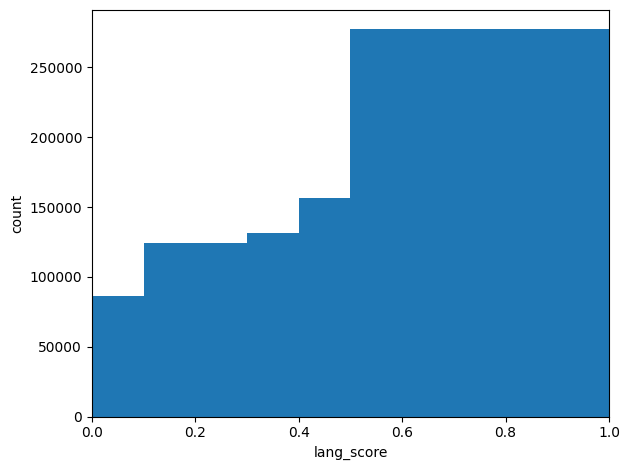

In [49]:
analyze_result(df, "lang_score", 1, 0.1)

perplexity mean:  3420.0861821589833
perplexity std:  5353.667376814537
perplexity 3-σ left:  -12640.91594828463
perplexity 3-σ right:  19481.088312602595


100%|██████████| 1059536/1059536 [00:12<00:00, 87993.30it/s]


label_count:  [265766, 288194, 164334, 97075, 60976, 41298, 28745, 20833, 15909, 76406]


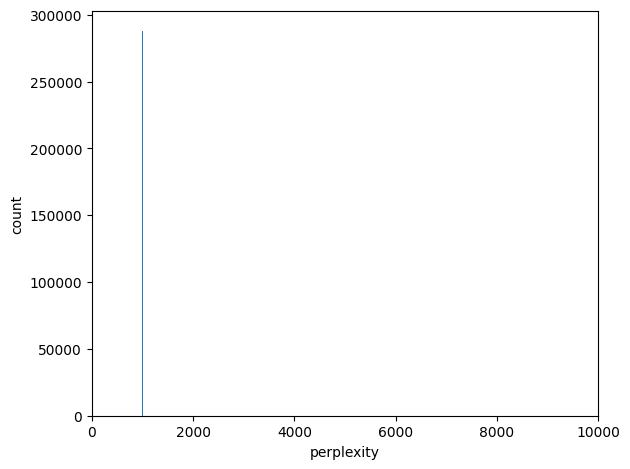

In [50]:
analyze_result(df, "perplexity", 10000, 1000)

text_len mean:  9.900525324292898
text_len std:  6.020805355987743
text_len 3-σ left:  -8.161890743670329
text_len 3-σ right:  27.962941392256127


100%|██████████| 1059536/1059536 [00:12<00:00, 82374.78it/s]


label_count:  [641640, 347863, 55900, 10232, 2492, 748, 316, 122, 70, 153]


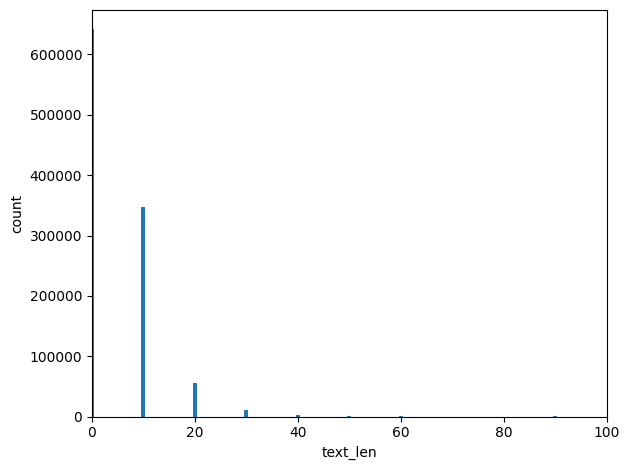

In [51]:
analyze_result(df, "text_len", 100, 10)

In [52]:
print("开始加载数据集")
data_path_juicer = os.environ.get('HOME') + "/cook-data/recipe_corpus_dedup.json"
f2 = open(data_path_juicer, 'r', encoding='utf-8')
json_data = []
# data juicer在保存时，以1000条数据为一组，每组数据单独保存在一行
# 所有这里需要两重循环
for line in f2.readlines():
    for recipe in json.loads(line):
        json_data.append(recipe)
print("加载数据集结束")

开始加载数据集
加载数据集结束


In [53]:
count_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang in count_dict:
        count_dict[lang] += 1
    else:
        count_dict[lang] = 1
print(count_dict)

100%|██████████| 1059536/1059536 [00:06<00:00, 168828.21it/s]

{'zh': 743131, 'ja': 193746, 'en': 51584, 'sr': 3502, 'ko': 10101, 'fi': 979, 'ur': 44, 'it': 6948, 'hu': 1557, 'pt': 2420, 'de': 5581, 'vi': 1148, 'ru': 3508, 'tr': 2293, 'be': 48, 'sk': 59, 'fa': 1076, 'fr': 8496, 'as': 9, 'wuu': 1002, 'nl': 378, 'es': 4108, 'eo': 1088, 'el': 1462, 'ta': 684, 'mk': 825, 'ceb': 2444, 'pl': 1456, 'ca': 592, 'tt': 101, 'id': 448, 'eu': 245, 'hr': 360, 'te': 84, 'ms': 276, 'cs': 449, 'he': 318, 'ml': 120, 'hy': 284, 'bg': 271, 'kn': 118, 'is': 33, 'sv': 693, 'uk': 668, 'my': 295, 'mr': 119, 'la': 36, 'no': 218, 'ar': 244, 'als': 31, 'lo': 9, 'af': 30, 'war': 103, 'ast': 4, 'sh': 290, 'sq': 44, 'hi': 160, 'gl': 84, 'ilo': 27, 'uz': 39, 'ro': 516, 'et': 74, 'da': 232, 'lt': 241, 'pa': 58, 'bn': 42, 'br': 31, 'gu': 66, 'ia': 145, 'ka': 229, 'th': 296, 'jv': 9, 'tg': 22, 'si': 25, 'sl': 162, 'sco': 7, 'kk': 33, 'or': 14, 'yue': 107, 'nds': 72, 'fy': 2, 'tl': 43, 'cv': 12, 'oc': 106, 'an': 11, 'lrc': 1, 'bs': 24, 'ba': 16, 'az': 97, 'lv': 59, 'dv': 10, 'nn': 

In [54]:
lang_list_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang not in lang_list_dict:
        lang_list_dict[lang] = []
    lang_list_dict[lang].append(i)

100%|██████████| 1059536/1059536 [00:09<00:00, 116013.20it/s]


In [55]:
n = 10
lang = 'en'
for i in range(n):
    print(json_data[lang_list_dict[lang][i]]['name'])

10寸披萨，鸡蛋面饼
零失败8寸蛋糕
抹茶色斑马戚风8寸蛋糕
“隔水法”8寸酸奶蛋糕🍰，轻乳酪蛋糕的口感
BBQ烤鸡
BBQ烤鸡翅
BBQ烤鸡串
Q弹鸡蛋羹
杂
陷
